**Customer Churn Prediction**

In [204]:
# Data Preprocessing Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Counting Library
from collections import Counter 

# Modelling Libraries


# Warnings
import warnings
warnings.filterwarnings("ignore")

**Features in the Dataset**
1. CustomerID: A unique identifier assigned to each telecom customer, enabling tracking and identification of individual customers.
2. Gender: The gender of the customer, which can be categorized as male, or female. This information helps in analyzing gender-based trends in customer churn.
3. SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen or not. This attribute helps in understanding if there are any specific churn patterns among senior customers.
4. Partner: Indicates whether the customer has a partner or not. This attribute helps in evaluating the impact of having a partner on churn behavior.
5. Dependents: Indicates whether the customer has dependents or not. This attribute helps in assessing the influence of having dependents on customer churn.
6. Tenure: The duration for which the customer has been subscribed to the telecom service. It represents the loyalty or longevity of the customer’s relationship with the company and is a significant predictor of churn.
7. PhoneService: Indicates whether the customer has a phone service or not. This attribute helps in understanding the impact of phone service on churn.
8. MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing the effect of having multiple lines on customer churn. 
9. InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service. It helps in evaluating the relationship between internet service and churn.
10. OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in analyzing the impact of online security on customer churn. 
11. OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in evaluating the impact of online backup on churn behavior. 
12. DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps in understanding the influence of device protection on churn.
13. TechSupport: Indicates whether the customer has technical support services or not. This attribute helps in assessing the impact of tech support on churn behavior.
14. StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in evaluating the impact of streaming TV on customer churn.
15. StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence of streaming movies on churn behavior.
16. Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.
17. PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of paperless billing on customer churn.
18. PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn.
19. MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior.
20. TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn.
21. Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.

In [205]:
df = pd.read_csv(r"../Capstone_Project/Customer-Churn.csv")
df1 = df.copy()
df1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [206]:
# Numerical Statistical Analysis
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [207]:
# Categorical Statistical Analysis
df1.describe(include=["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Data Cleaning

### Remove Duplicates

In [208]:
# Checks for number of rows and columns
df1.shape

(7043, 21)

In [209]:
# Count of all entries
# df1.duplicated().count()

In [210]:
# Checks for duplicates checks for true values
df1.duplicated().sum()

0

### Deal with Missing values

In [211]:
# Check data for anomalies - Data type, missing values, number of features and rows
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation**
- No missing values.
- TotalCharges datatype is an object.

In [212]:
# Convert TotalCharges to float
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [213]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation**
- TotalCharges data type has been converted to a float.

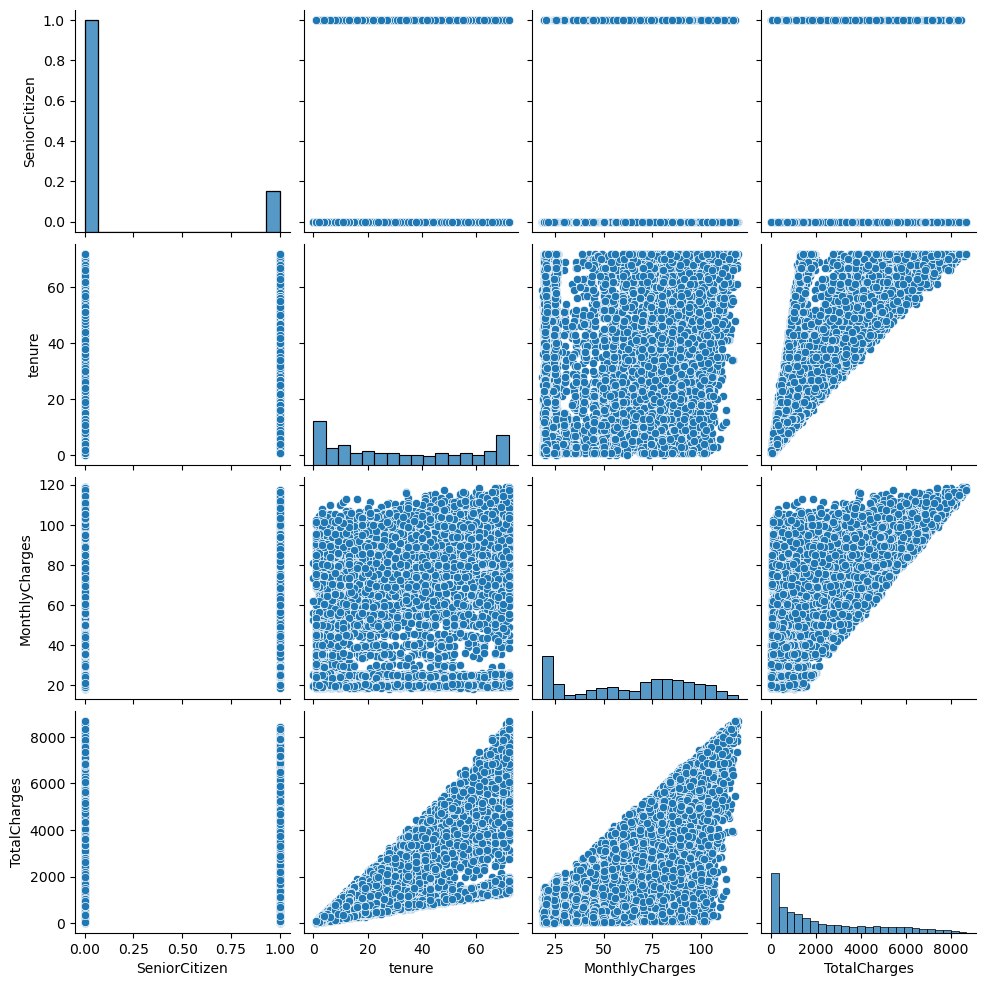

In [214]:
# Outlier detection and handling
sns.pairplot(df1);

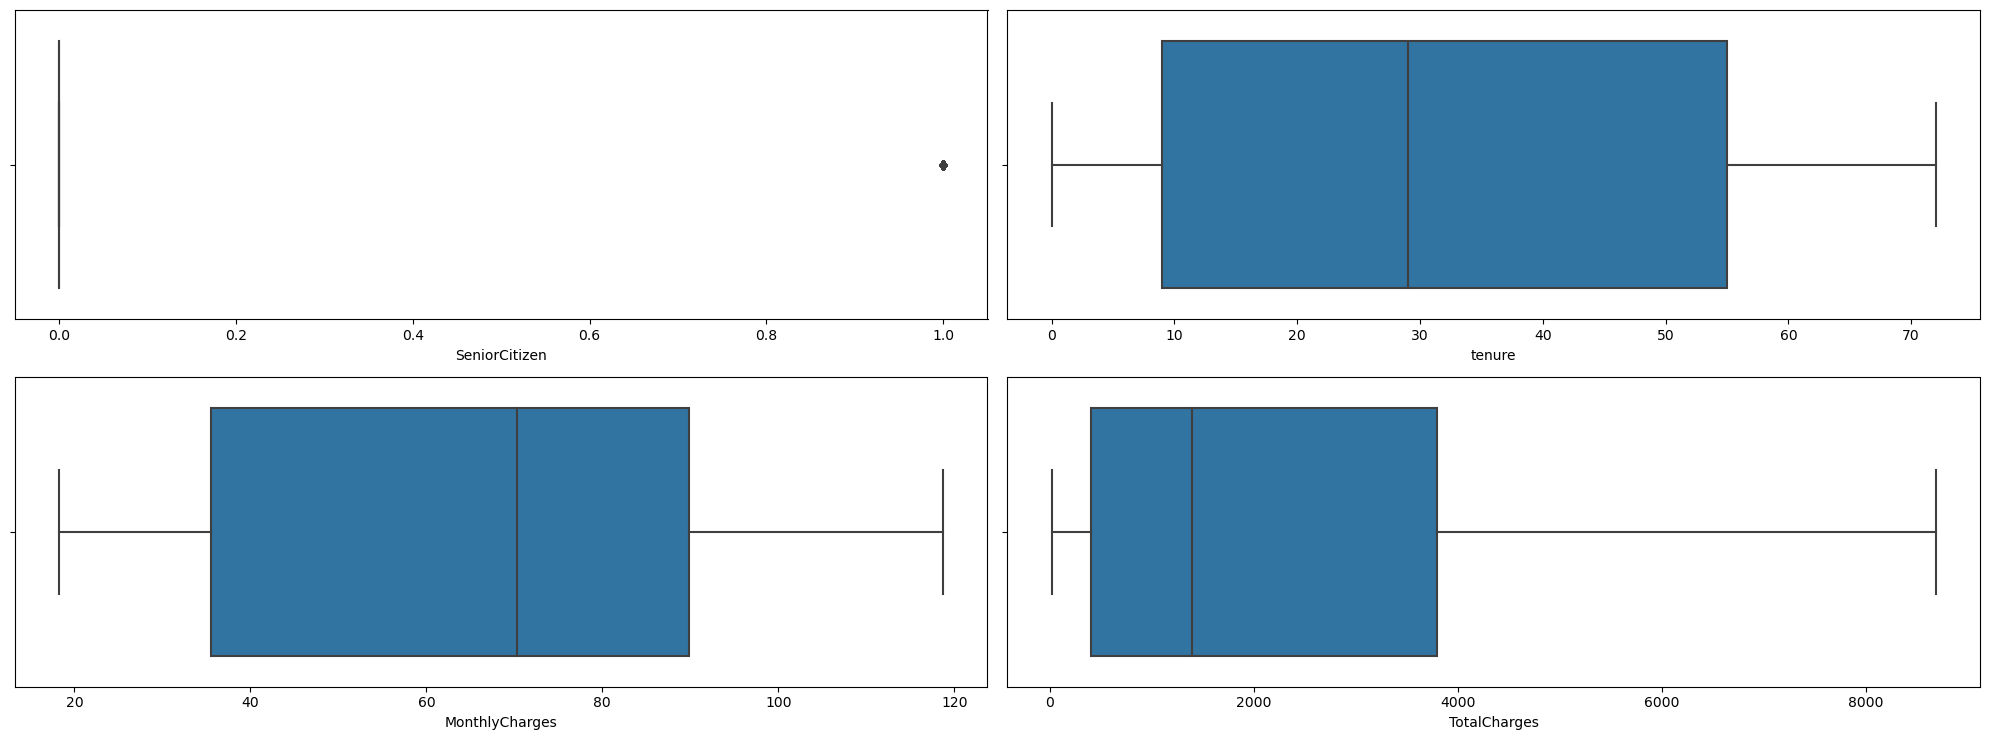

In [215]:
# Check for an outlier
fig, axs = plt.subplots(2,2,figsize=(20,7.5))
plt1 = sns.boxplot(x=df1['SeniorCitizen'], ax=axs[0,0])
plt2 = sns.boxplot(x=df1['tenure'], ax=axs[0,1])
plt3 = sns.boxplot(x=df1['MonthlyCharges'], ax=axs[1,0])
plt4 = sns.boxplot(x=df1['TotalCharges'], ax=axs[1,1])

plt.tight_layout()

**Observation**
- Presence of an outlier in SeniorCitizen

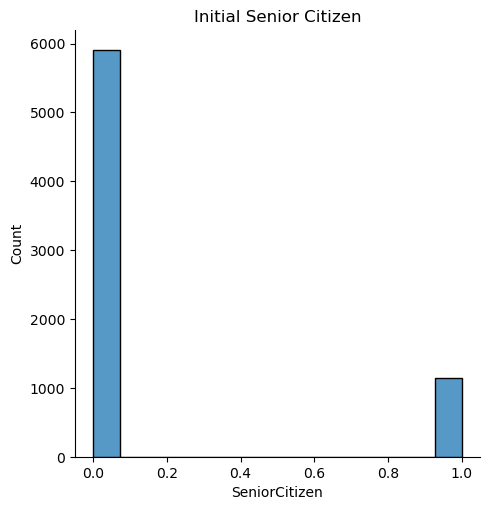

In [216]:
sns.displot(df1['SeniorCitizen'])
plt.title('Initial Senior Citizen');

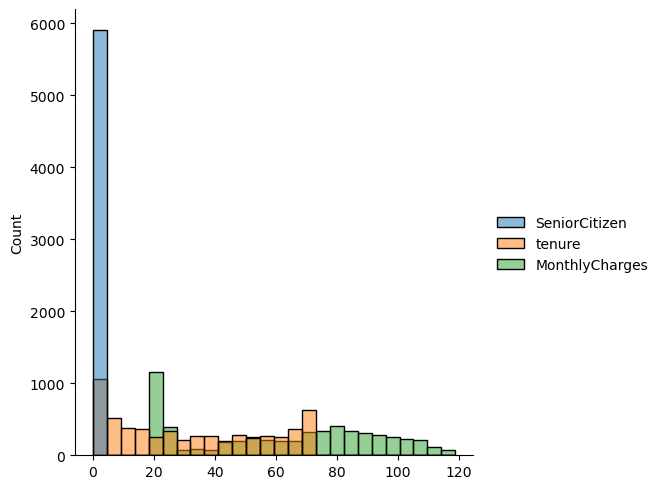

In [217]:
# Drop an outlier - drops outliers that's greater than 0.9
df_without_outliers = df[df['SeniorCitizen'] < 1.0]
sns.displot(df_without_outliers);

### Correlation

In [218]:
corr_matrix = df1.corr()
corr_matrix()

ValueError: could not convert string to float: '7590-VHVEG'

In [ ]:
sns.heatmap(corr_matrix, cmap=plt.cm.Blues)
plt.title('Correlation Heatmap for Customer Churn Data')
plt.show()

NameError: name 'corr_matrix' is not defined

In [ ]:
target = abs(corr_matrix['Churn'])

In [ ]:
# Data Features - Checks for columns
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [219]:
#df1.tenure.min()/max() # Group tenure by months
def group_tenure(x):
    if x <= 30:
        return "One month"
    elif x <= 60:
        return "Two months"
    else:
        return "Three months"
    
# Apply function to the data
df1["tenure_group"] = df1["tenure"].apply(group_tenure)
df1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,One month
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Two months


### Univariate Data Analysis

In [ ]:
# df1['gender'].value_counts()

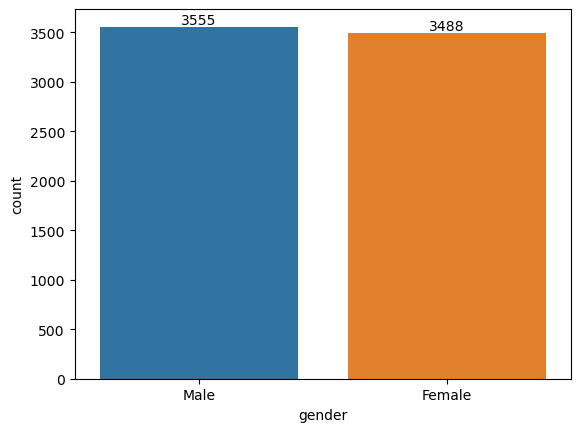

In [ ]:
# Visualizing Gender
ax = sns.countplot(x=df1["gender"], order=df1["gender"].value_counts(ascending=False).index)
values = df1["gender"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# sns.countplot(x="gender", data=df1).set_title("Customers by Gender");

- The ratio of male to female customers is average.

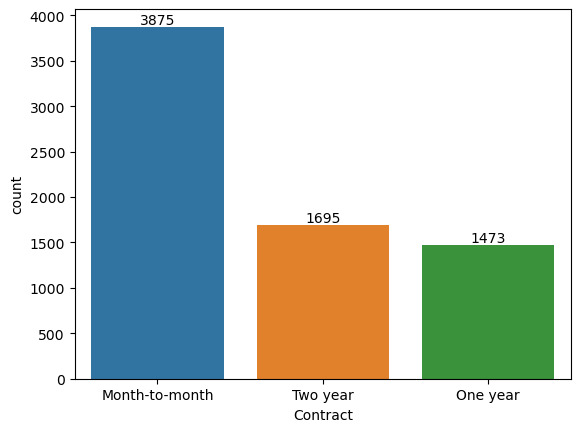

In [ ]:
# Type of Contract
ax = sns.countplot(x=df1["Contract"], order=df1["Contract"].value_counts(ascending=False).index)
values = df1["Contract"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

- Most customers preferred Month-to-month contracts compared to Two year and One year contracts meaning there is limited customer loyalty.

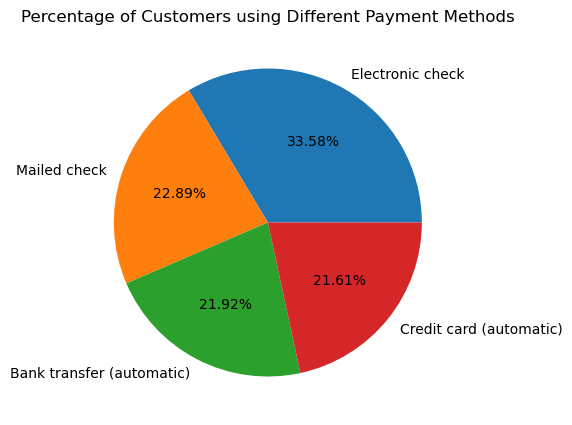

In [ ]:
# Payment Methods
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df1["PaymentMethod"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")
ax.set_title("Percentage of Customers using Different Payment Methods")
plt.show();

- Electronic check was the most preferred payment method with 33.58% of customers utilizing it.
- Mailed check was the second most preferred payment methods accounting for 22.89% of customer usage.
- Bank transfer (automatic) and Credit card (automatic) were the third and forth preferred payment methods accounting for 21.92% and 21.61% of customer population respectively.

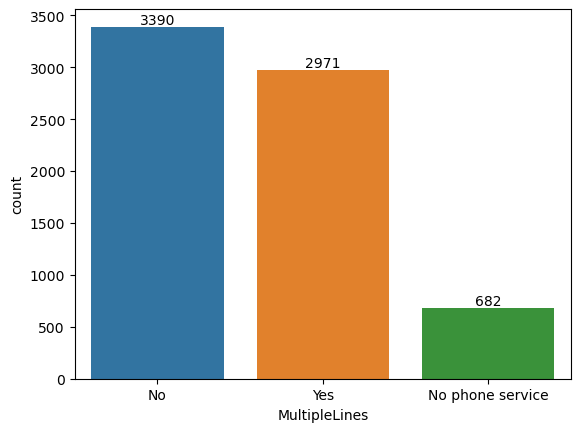

In [ ]:
# sns.countplot(x="MultipleLines", data=df1).set_title("Customers by Lines");
ax = sns.countplot(x=df1["MultipleLines"], order=df1["MultipleLines"].value_counts(ascending=False).index)
values = df1["MultipleLines"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

- Most customers preferred the use of single lines to multiple lines.

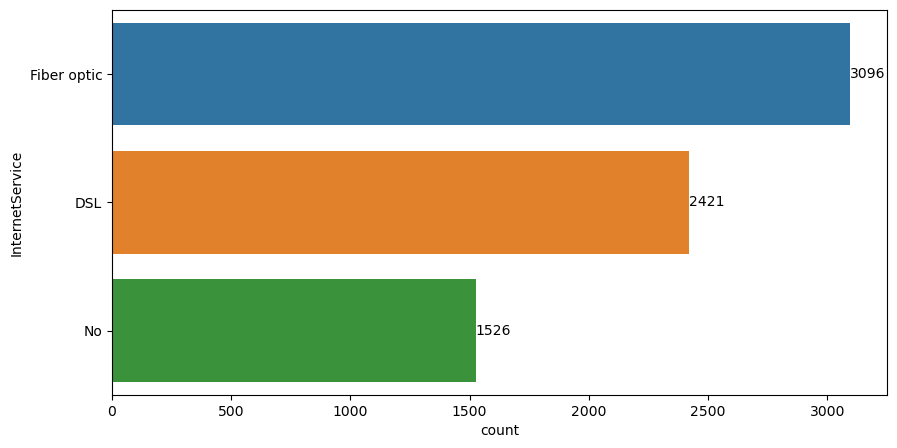

In [ ]:
# Internet Service
plt.figure(figsize=(10,5))
intServ = sns.countplot(y=df1["InternetService"], order=df1["InternetService"].value_counts(ascending=False).index)
intServValues = df1["InternetService"].value_counts(ascending=False).values
intServ.bar_label(container=intServ.containers[0], labels=intServValues);

- Most customers preferred Fiber Optic to DSL internet service with each having 3096 and 2421 customers respectively.
- Additionally, 1526 customers did not consume internet.

In [ ]:
# sns.countplot(x="SeniorCitizen", data=df1).set_title("Customers by Citizen");

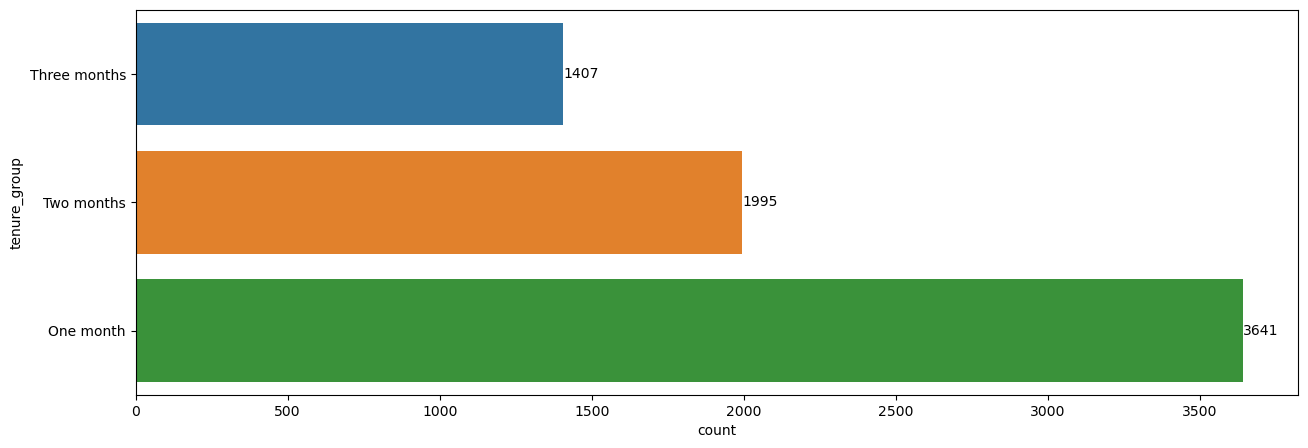

In [ ]:
# Count Transactions by customer tenure
plt.figure(figsize=(15,5))
ag = sns.countplot(y=df1["tenure_group"], order=df1["tenure_group"].value_counts(ascending=True).index)
values = df1["tenure_group"].value_counts(ascending=True).values
ag.bar_label(container=ag.containers[0], labels=values);

- Most customers subscribed for 1 month Telecom service compared to the other months. This means there is limited customer loyalty.

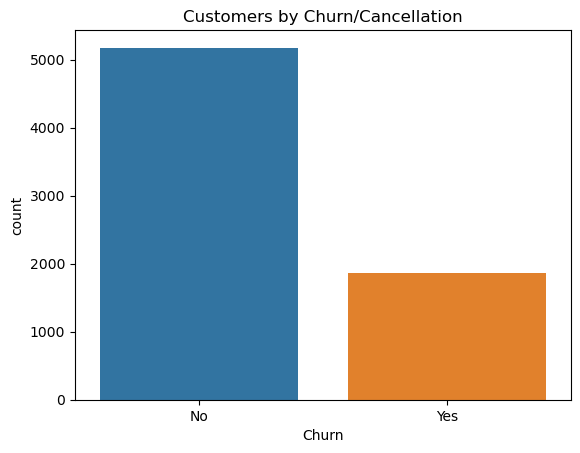

In [225]:
# Data Visualization - Churn (Churn or not - 1- Yes, 0 - No)
sns.countplot(x="Churn", data=df1).set_title("Customers by Churn/Cancellation");

- Low number of customers cancelling telecom services meaning there is high customer loyalty to the services provided by the company.

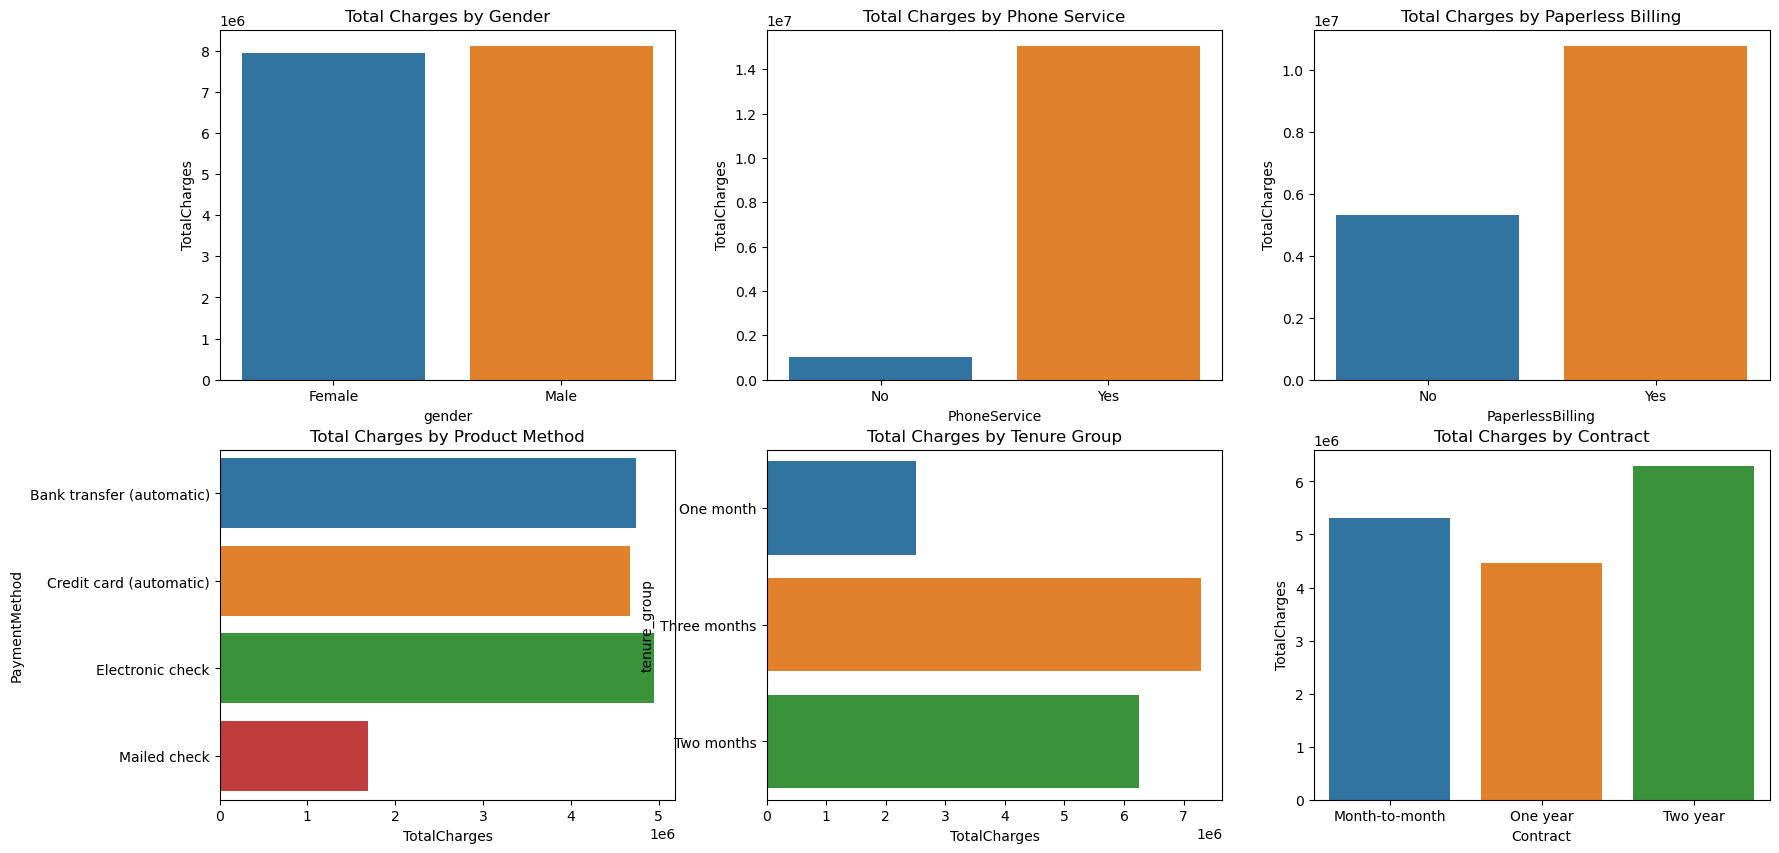

In [224]:
# Categorical Columns - Total and Monthly Charges
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

gender_total_charges = df1.groupby("gender")["TotalCharges"].sum().reset_index()
sns.barplot(x="gender", data=gender_total_charges, y="TotalCharges", ax=axs[0,0])
axs[0,0].set_title("Total Charges by Gender");

phone_service_charges = df1.groupby("PhoneService")["TotalCharges"].sum().reset_index()
sns.barplot(x="PhoneService", data=phone_service_charges, y="TotalCharges", ax=axs[0,1])
axs[0,1].set_title("Total Charges by Phone Service");

paperless_Billing_Charges = df1.groupby("PaperlessBilling")["TotalCharges"].sum().reset_index()
sns.barplot(x="PaperlessBilling", data=paperless_Billing_Charges, y="TotalCharges", ax=axs[0,2])
axs[0,2].set_title("Total Charges by Paperless Billing");

payment_method_charges = df1.groupby("PaymentMethod")["TotalCharges"].sum().reset_index()
sns.barplot(y="PaymentMethod", data=payment_method_charges, x="TotalCharges", ax=axs[1,0])
axs[1,0].set_title("Total Charges by Product Method");

# streaming_movies_monthly_charges = df1.groupby("StreamingMovies")["MonthlyCharges"].sum().reset_index()
# sns.barplot(x="StreamingMovies", data=streaming_movies_monthly_charges, y="MonthlyCharges", ax=axs[1,1])
# axs[1,1].set_title("Monthly Charges by Streaming movies");

# streamingTV_monthly_charges = df1.groupby("StreamingTV")["MonthlyCharges"].sum().reset_index()
# sns.barplot(x="StreamingTV", data=streamingTV_monthly_charges, y="MonthlyCharges", ax=axs[1,2])
# axs[1,2].set_title("Monthly Charges by Streaming TV");

tenure_group_totalCharges = df1.groupby("tenure_group")["TotalCharges"].sum().reset_index()
sns.barplot(y="tenure_group", data=tenure_group_totalCharges, x="TotalCharges", ax=axs[1,1])
axs[1,1].set_title("Total Charges by Tenure Group");

contract_total_charges = df1.groupby("Contract")["TotalCharges"].sum().reset_index()
sns.barplot(x="Contract", data=contract_total_charges, y="TotalCharges", ax=axs[1,2])
axs[1,2].set_title("Total Charges by Contract");

# churn = df1.groupby("Churn")["TotalCharges"].sum().reset_index()
# sns.barplot(y="Churn", data=churn, x="TotalCharges", ax=axs[2,2])
# axs[2,2].set_title("Total Charges by Churn");

**Observations:**
- [0, 0] - Both Male and Female generated significant profits for the Telecom Company.
- [0, 1] - Customers who utilized Phone Service generated signficantly high profits compared to customers who did not utilize Phone Service.
- [0, 2] - Most customers utilized paperless billing system generating huge revenue for the company.
- [1, 0] - Electronic check generated more revenue followed by Mail check, Bank transfer (automatic) and Credit card (autmatic) payment methods respectively.
- [1, 1] - Customers who have subscribed to telecom services for three months generated more revenue followed by two-months and one-month customer loyalty respectively. Additionally, this shows that customers are loyal to telecom services.
- [1, 2] - Customers who have subscribed for contracts lasting two years with the telecom service providers generated significant revenue followed by customers with one year and month-to-month contracts respectively.

In [ ]:
# df1['Churn'] = df1['Churn'].map({'yes': 1, 'No': 0})

In [ ]:
type('Churn')

str

### Bivariate Data Analysis

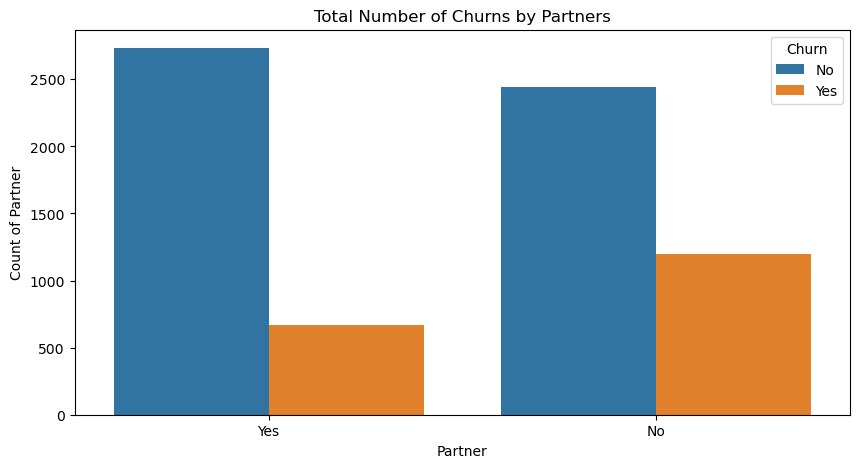

In [226]:
# Investigating the Partner by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='Partner', data=df1, hue='Churn')
plt.xlabel('Partner')
plt.ylabel('Count of Partner')
plt.title('Total Number of Churns by Partners');

- Customers with partners had low cancellation of telecom services compared to customers without partners. It is easier to retain customers with partners than customers without partners.

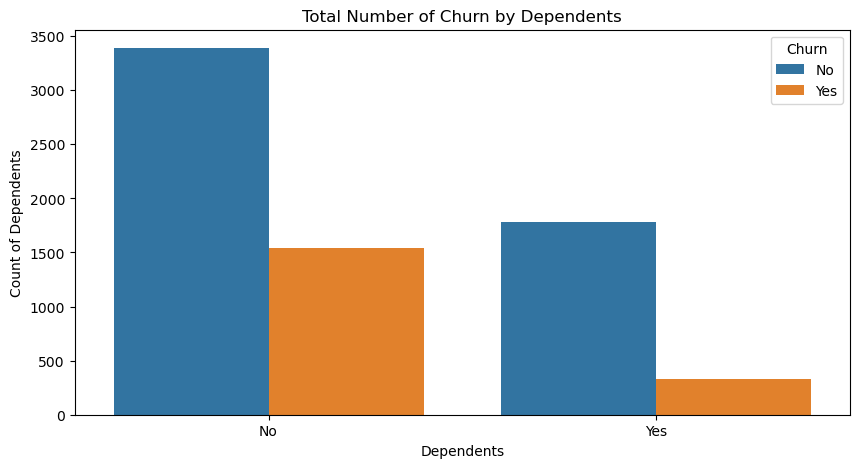

In [227]:
# Investigating the Dependants by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='Dependents', data=df1, hue='Churn')
plt.xlabel('Dependents')
plt.ylabel('Count of Dependents')
plt.title('Total Number of Churn by Dependents');

- Customers without dependents were likely to cancel telecom services compared to customers with dependents. Thus, it was easier to retain customers with dependents as compared to customers without dependents.

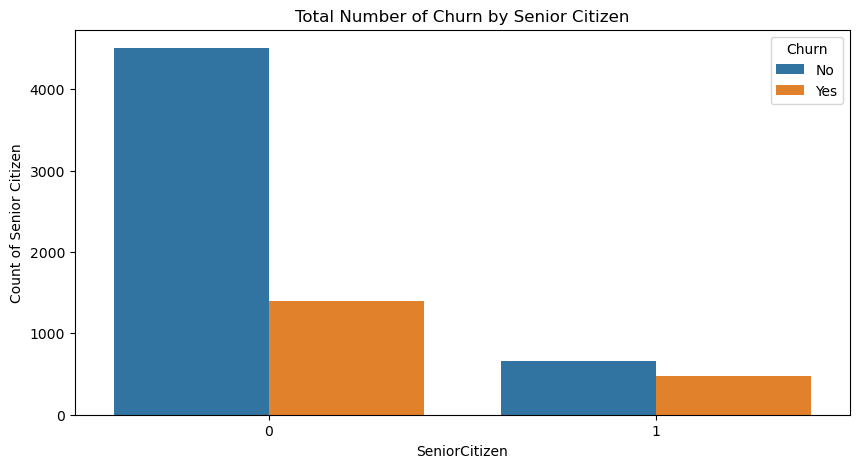

In [228]:
# Investigating the SeniorCitizen by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='SeniorCitizen', data=df1, hue='Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count of Senior Citizen')
plt.title('Total Number of Churn by Senior Citizen');

- Non-Senior Citizen customers were not likely to cancel telecom services. 

In [230]:
# df['SeniorCitizen'].value_counts()

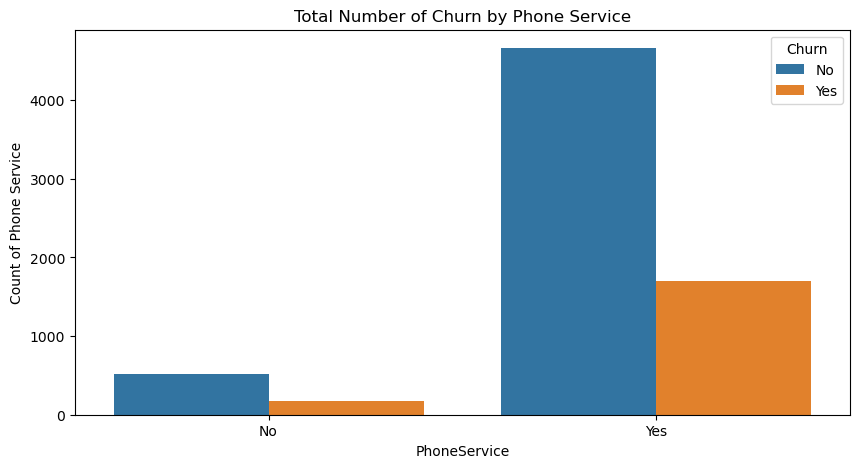

In [231]:
# Investigating the PhoneService by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='PhoneService', data=df1, hue='Churn')
plt.xlabel('PhoneService')
plt.ylabel('Count of Phone Service')
plt.title('Total Number of Churn by Phone Service');

- Customers utilizing phone service are less likely to cancel telecom services compared to customers who don't use Phone services.

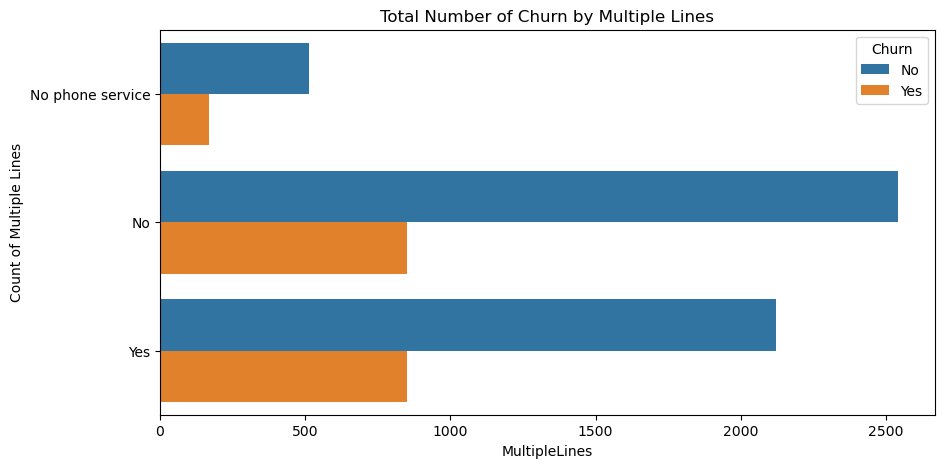

In [232]:
# Investigating the MultipleLines by the target feature
plt.figure(figsize=(10,5))
sns.countplot(y='MultipleLines', data=df1, hue='Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Count of Multiple Lines')
plt.title('Total Number of Churn by Multiple Lines');

- Customers using single lines are less likely to terminate telecom services followed by customers using multiple lines and customers with no lines respectively.

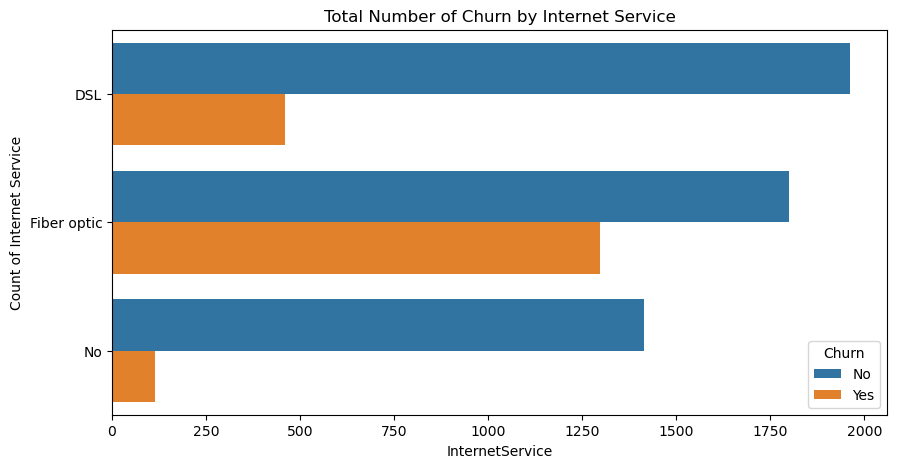

In [233]:
# Investigating the InternetService by the target feature
plt.figure(figsize=(10,5))
sns.countplot(y='InternetService', data=df1, hue='Churn')
plt.xlabel('InternetService')
plt.ylabel('Count of Internet Service')
plt.title('Total Number of Churn by Internet Service');

- Customers using DSL internet service are less likely to cancel telecom services compared to customers using Fiber optic internet services.

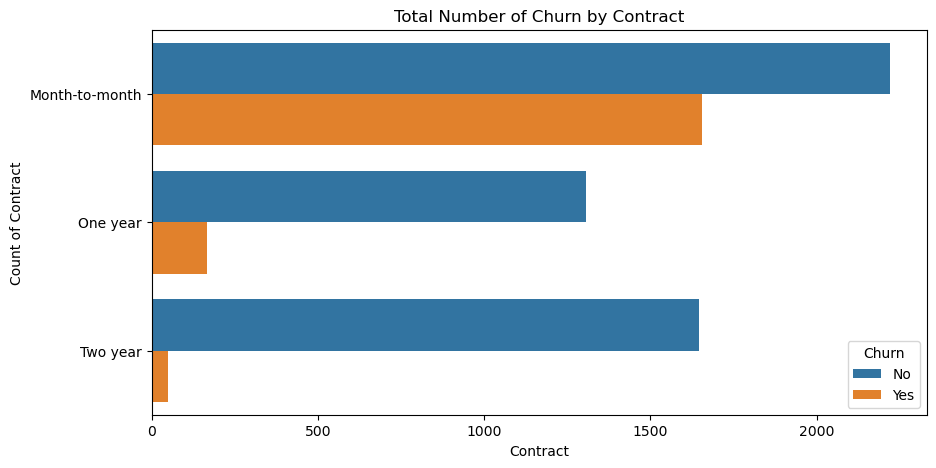

In [234]:
# Investigating the Contract by the target feature
plt.figure(figsize=(10,5))
sns.countplot(y='Contract', data=df1, hue='Churn')
plt.xlabel('Contract')
plt.ylabel('Count of Contract')
plt.title('Total Number of Churn by Contract');

- Customers subscibed to month-to-month services are more likely to cancel telecom services compared to two-year and one-year respectively.

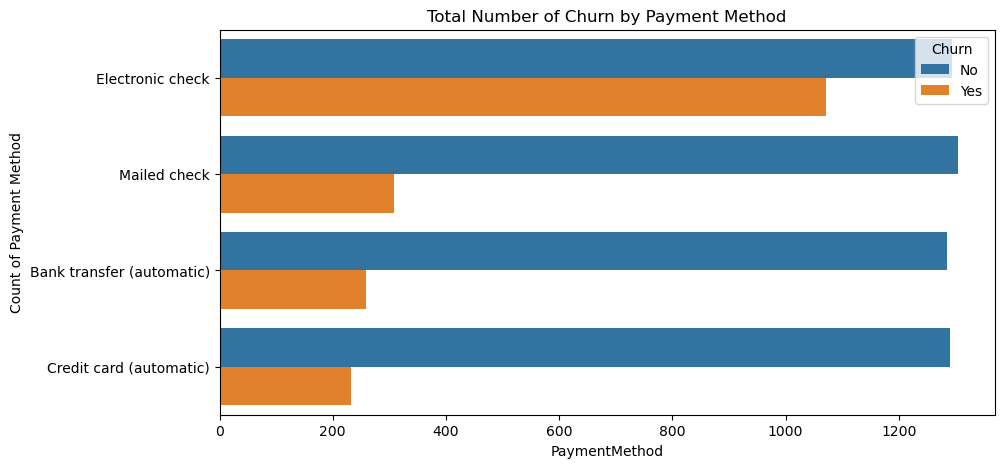

In [235]:
# Investigating the PaymentMethod by the target feature
plt.figure(figsize=(10,5))
sns.countplot(y='PaymentMethod', data=df1, hue='Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Count of Payment Method')
plt.title('Total Number of Churn by Payment Method');

- Customers transacting using Electronic check are more likely to cancel telecom services compared to customers using Mailed check, Bank transfer (automatic), and Credit card (automatic) payment methods respectively.

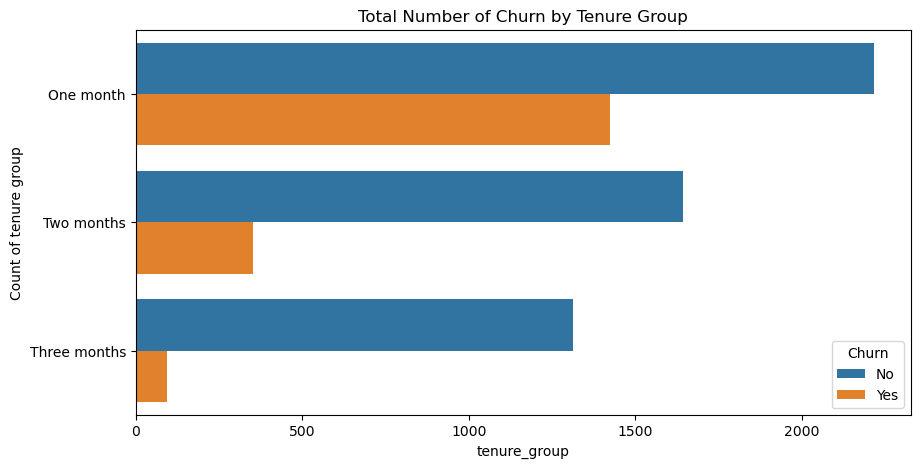

In [236]:
# Investigating the tenure_group by the target feature
plt.figure(figsize=(10,5))
sns.countplot(y='tenure_group', data=df1, hue='Churn')
plt.xlabel('tenure_group')
plt.ylabel('Count of tenure group')
plt.title('Total Number of Churn by Tenure Group');

- Customers loyal to telecom services for a month are more likely to cancel telecom services compared to customers present for two and three months.

### Multivariate Data Analysis

In [ ]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')